In [1]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Example
#Dataset
#https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv
df = pd.read_csv("https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv")
df

,Temperature,Humidity,Fires
0,22.8,40,No
1,29.6,27,Yes
2,17.8,51,No
3,19.3,38,No
4,28.6,27,Yes
5,17.8,56,Yes
6,17.7,25,Yes
7,18.2,46,Yes
8,25.1,27,No
9,30.2,24,No


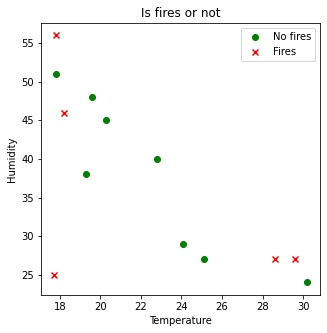

In [3]:
#plot results
GroupNo = df[df['Fires']=='No']
GroupYes = df[df['Fires']=='Yes']
plt.figure(figsize=(5,5))
plt.title("Is fires or not")
plt.scatter(GroupNo['Temperature'],GroupNo['Humidity'],color='green',marker = 'o',label='No fires')
plt.scatter(GroupYes['Temperature'],GroupYes['Humidity'],color='red',marker = 'x',label='Fires')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(loc='upper right')
plt.show()

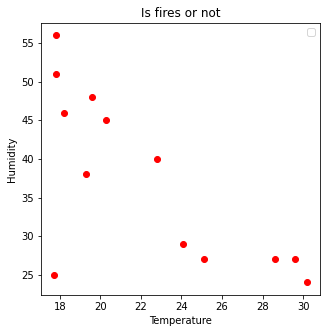

In [4]:
#plot results
GroupNo = df[df['Fires']=='No']
GroupYes = df[df['Fires']=='Yes']
plt.figure(figsize=(5,5))
plt.title("Is fires or not")
plt.scatter(GroupNo['Temperature'],GroupNo['Humidity'],color='red',marker = 'o')
plt.scatter(GroupYes['Temperature'],GroupYes['Humidity'],color='red',marker = 'o')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(loc='upper right')
plt.show()

In [5]:
#import machine learning library
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=2, random_state=1,)

In [7]:
model = kmeans.fit(df[['Temperature','Humidity']])

In [8]:
from sklearn import metrics
labels = model.labels_
labels

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int32)

In [9]:
metrics.silhouette_score(df[['Temperature','Humidity']], labels, metric='euclidean')

0.6448316893338306

In [10]:
#New data
new_temperature = 25.1 
new_humidity = 33

answer = model.predict([[new_temperature,new_humidity]])
print("The answer is",answer[0])

The answer is 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
#Calcutate distance
def get_distance(X,Y,x_point,y_point):
  return np.sort(np.sqrt((X-x_point)**2 + (Y-y_point)**2))
distance = get_distance(df['Temperature'],df['Humidity'],new_temperature,new_humidity)
distance

array([ 4.12310563,  6.        ,  6.94622199,  7.36817481,  7.5       ,
        7.65767589, 10.34456379, 10.89770618, 12.92439554, 14.71767645,
       15.97654531, 19.42395428, 24.13068586])

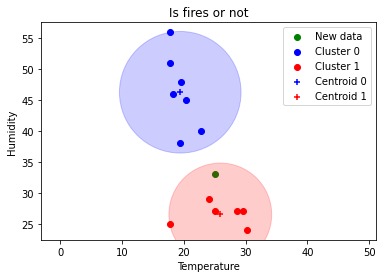

In [12]:
#Plot results
Cluster0 = df[model.labels_ == 0]
Cluster1 = df[model.labels_ == 1]

cx1,cy1 = model.cluster_centers_[0]
cx2,cy2 = model.cluster_centers_[1]

distance1 = get_distance(Cluster0['Temperature'],Cluster0['Humidity'],cx1,cy1)
distance2 = get_distance(Cluster1['Temperature'],Cluster1['Humidity'],cx2,cy2)

radious1 = max(distance1)
radious2 = max(distance2)

plt.title("Is fires or not")
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.axis('equal')

circle1 = plt.Circle((cx1,cy1),radious1,alpha=0.2,color='b')
plt.gcf().gca().add_artist(circle1)
circle2 = plt.Circle((cx2,cy2),radious2,alpha=0.2,color='r')
plt.gcf().gca().add_artist(circle2)

plt.scatter(new_temperature,new_humidity,c='g',label = 'New data')
plt.scatter(Cluster0['Temperature'],Cluster0['Humidity'],c='b',label = 'Cluster 0')
plt.scatter(Cluster1['Temperature'],Cluster1['Humidity'],c='r',label = 'Cluster 1')
plt.scatter(cx1,cy1,c='b',marker='+',label='Centroid 0')
plt.scatter(cx2,cy2,c='r',marker='+',label='Centroid 1')
plt.legend()

In [13]:
Num_K = [i+2 for i in range(9)]
silhouette_coef = []

for k in Num_K:
  kmeans = KMeans(n_clusters=k, random_state=1,)
  model = kmeans.fit(df[['Temperature','Humidity']])
  labels = model.labels_
  silhouette_coef.append(metrics.silhouette_score(df[['Temperature','Humidity']], labels, metric='euclidean'))
silhouette_coef

[0.6448316893338306,
 0.4720235020455968,
 0.4714652472357601,
 0.4637338439400513,
 0.4627505525569149,
 0.38833953783072483,
 0.30986731993924904,
 0.2813138918989939,
 0.20748088532957415]

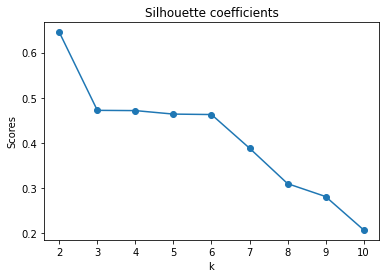

In [14]:
plt.scatter(Num_K,silhouette_coef)
plt.plot(Num_K,silhouette_coef)
plt.title('Silhouette coefficients')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

In [15]:
Num_K = [i+1 for i in range(10)]
WCSS = []

for k in Num_K:
  kmeans = KMeans(n_clusters=k, random_state=1,)
  model = kmeans.fit(df[['Temperature','Humidity']])
  WCSS.append(model.inertia_)
WCSS

[1775.0615384615385,
 374.4969047619048,
 217.52833333333336,
 135.185,
 70.60633333333332,
 37.385,
 24.884999999999998,
 16.76,
 9.953333333333337,
 5.705000000000004]

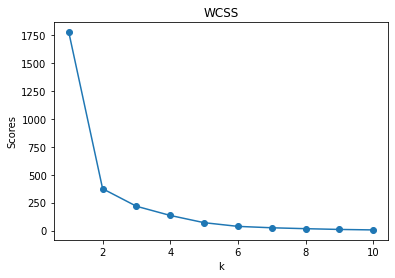

In [16]:
plt.scatter(Num_K,WCSS )
plt.plot(Num_K,WCSS )
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()